In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data, util
from skimage.color import rgb2gray

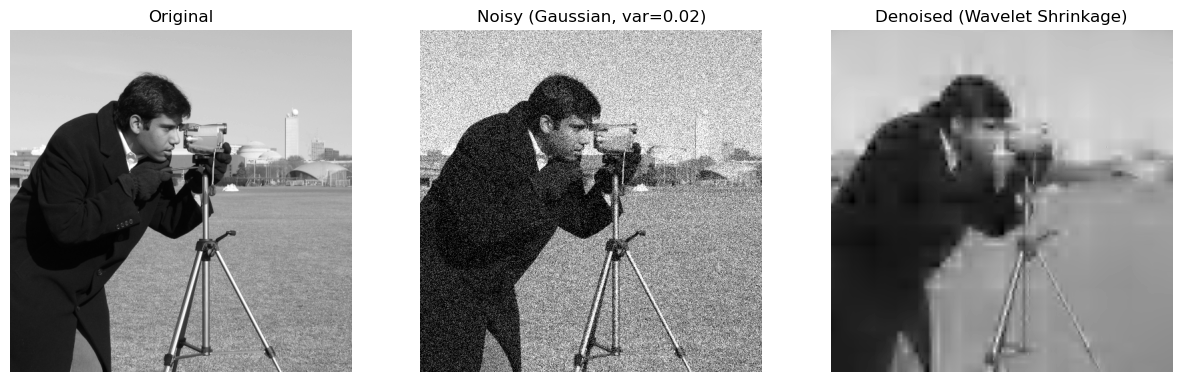

In [4]:
def estimate_sigma_mad(detail_coeffs):
    """
    Estimate noise using the Median Absolute Deviation (MAD)
    of wavelet detail coefficients.
    """
    arr = np.asarray(detail_coeffs).ravel()
    median = np.median(arr)
    mad = np.median(np.abs(arr - median))
    return mad / 0.6745

def wavelet_denoise(noisy_img, wavelet='db1', level=None):
    """
    Wavelet-based image denoising with universal threshold (VisuShrink).
    """
    coeffs = pywt.wavedecn(noisy_img, wavelet=wavelet, level=level)
    # Estimate noise from highest-level detail
    last_detail = coeffs[-1]
    sigma_est_list = [estimate_sigma_mad(last_detail[k]) for k in last_detail.keys()]
    sigma = np.mean(sigma_est_list)
    
    # Universal threshold
    N = noisy_img.size
    threshold = sigma * np.sqrt(2 * np.log(N))
    
    # Threshold detail coefficients
    new_coeffs = [coeffs[0]]  # keep the approx as is
    for detail_dict in coeffs[1:]:
        detail_thresholded = {}
        for k, v in detail_dict.items():
            detail_thresholded[k] = pywt.threshold(v, threshold, mode='soft')
        new_coeffs.append(detail_thresholded)
    
    # Inverse transform
    denoised_img = pywt.waverecn(new_coeffs, wavelet=wavelet)
    return np.clip(denoised_img, 0, 1)

# 1. Load an image
image = data.camera().astype(np.float32) / 255.0

# 2. Add Gaussian noise
noisy_image = util.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet_denoise(noisy_image, wavelet='db2', level=None)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()


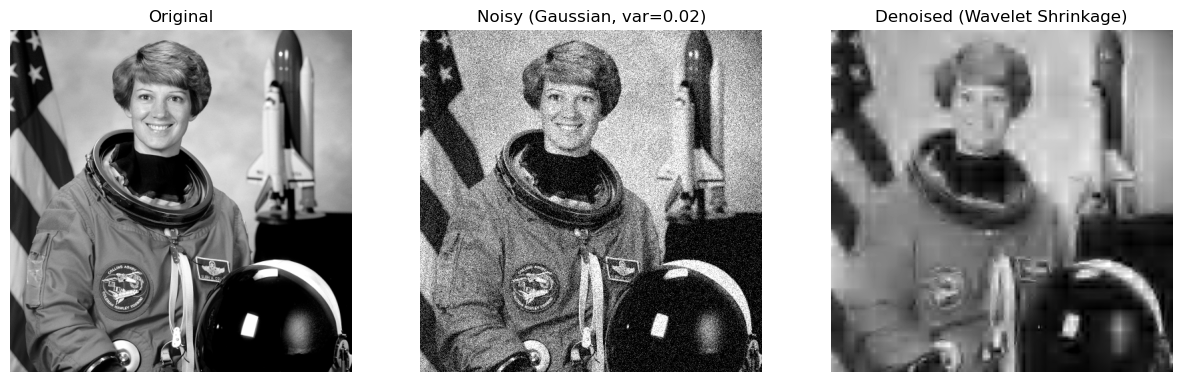

In [8]:
# 1. Load an image
image = data.astronaut().astype(np.float32) / 255.0

# 2. Convert it to grayscale
image = rgb2gray(image)

# 2. Add Gaussian noise
noisy_image = util.random_noise(image, mode='gaussian', var=0.02)

# 3. Denoise with wavelet shrinkage
denoised_image = wavelet_denoise(noisy_image, wavelet='db2', level=None)

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Noisy (Gaussian, var=0.02)")
axes[1].axis("off")

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title("Denoised (Wavelet Shrinkage)")
axes[2].axis("off")

plt.show()
